## Name: Allison Ebsen

# LOADING THE FASHIONMNIST DATASET

In [ ]:
# Install and make sure Tensorflow is up-to-date
!pip install --upgrade tensorflow

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np



In [ ]:
# Load Fashion MNIST data
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize from 0 to 1
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Split into Train, Test, Split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)


In [ ]:
# Verify number of samples in each set
print(f"Training set size: {x_train.shape[0]}")
print(f"Validation set size: {x_val.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")


Training set size: 45000
Validation set size: 15000
Test set size: 10000


# BUILD BASELINE MODEL

In [ ]:
# SAVE METRICS
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []



## BASELINE MODEL

In [ ]:
# Construct base model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [ ]:
# Display model layers
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile with ADAM optimizer
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Fit base model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val)
)


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 64s 86ms/step - accuracy: 0.6761 - loss: 0.8980 - val_accuracy: 0.8582 - val_loss: 0.4088
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 71s 70ms/step - accuracy: 0.8402 - loss: 0.4348 - val_accuracy: 0.8752 - val_loss: 0.3455
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 45s 63ms/step - accuracy: 0.8631 - loss: 0.3773 - val_accuracy: 0.8866 - val_loss: 0.3103
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 65ms/step - accuracy: 0.8787 - loss: 0.3347 - val_accuracy: 0.8925 - val_loss: 0.2992
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.8872 - loss: 0.3096 - val_accuracy: 0.8983 - val_loss: 0.2751
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 62ms/step - accuracy: 0.8945 - loss: 0.2832 - val_accuracy: 0.9020 - val_loss: 0.2703
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 85s 66ms/step - accuracy: 0.9026 - loss: 0.2654 - val_accuracy: 0.9059 - val_loss: 0.2563
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 89s 76ms/step - accuracy: 0.9094 - loss: 0.2521 - 

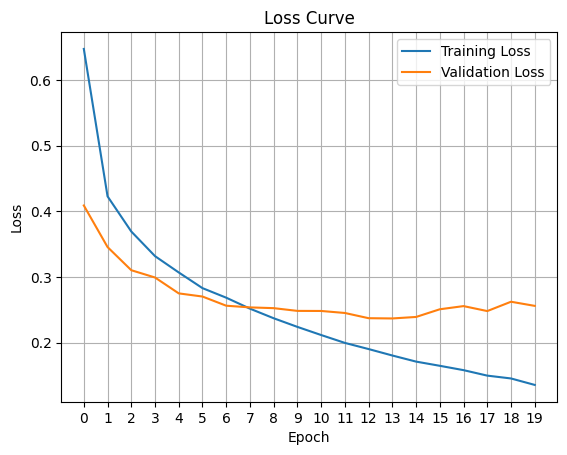

In [ ]:
# Plot the loss over each epoch
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.xticks(range(len(history.history['loss'])))
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Get the model's predictions on the test set
y_pred = model.predict(x_test)

# Get the class with the highest probability
y_pred = np.argmax(y_pred, axis=1)

# Compute accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Save metrics for the base model
model_names.append("Model")
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1)

# Print the metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Test Accuracy: 0.9089
Precision: 0.9105
Recall: 0.9089
F1 Score: 0.9095


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


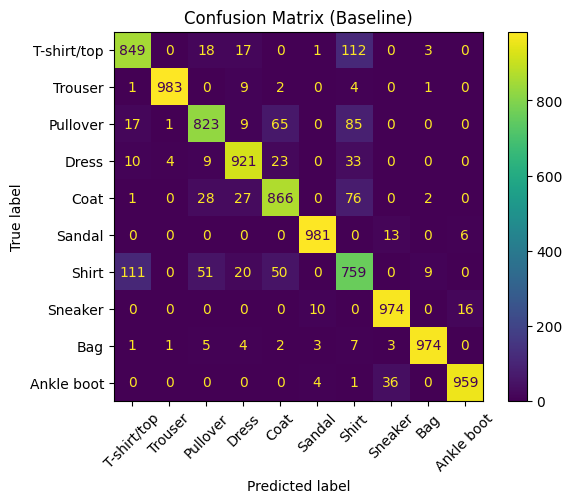

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get test set predictions
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Build confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
])

disp.plot(cmap='viridis', xticks_rotation=45)
plt.title('Confusion Matrix (Baseline)')
plt.show()


# EXPERIMENTATION

## AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generate augmented images

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build model for augmented images
modelAug = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile model with ADAM optimizer
modelAug.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Fit model and use augmented images
historyAug = modelAug.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(x_val, y_val),
    verbose=2
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 - 57s - 81ms/step - accuracy: 0.6672 - loss: 0.8950 - val_accuracy: 0.7701 - val_loss: 0.5757
Epoch 2/20
704/704 - 54s - 77ms/step - accuracy: 0.7494 - loss: 0.6679 - val_accuracy: 0.7991 - val_loss: 0.5192
Epoch 3/20
704/704 - 56s - 79ms/step - accuracy: 0.7724 - loss: 0.6049 - val_accuracy: 0.8354 - val_loss: 0.4502
Epoch 4/20
704/704 - 55s - 78ms/step - accuracy: 0.7908 - loss: 0.5591 - val_accuracy: 0.8461 - val_loss: 0.4192
Epoch 5/20
704/704 - 55s - 78ms/step - accuracy: 0.8002 - loss: 0.5304 - val_accuracy: 0.8613 - val_loss: 0.3843
Epoch 6/20
704/704 - 55s - 78ms/step - accuracy: 0.8110 - loss: 0.5073 - val_accuracy: 0.8625 - val_loss: 0.3681
Epoch 7/20
704/704 - 55s - 78ms/step - accuracy: 0.8190 - loss: 0.4845 - val_accuracy: 0.8708 - val_loss: 0.3521
Epoch 8/20
704/704 - 82s - 117ms/step - accuracy: 0.8267 - loss: 0.4680 - val_accuracy: 0.8767 - val_loss: 0.3413
Epoch 9/20
704/704 - 56s - 80ms/step - accuracy: 0.8304 - loss: 0.4559 - val_accuracy: 0.8761 - val_loss: 

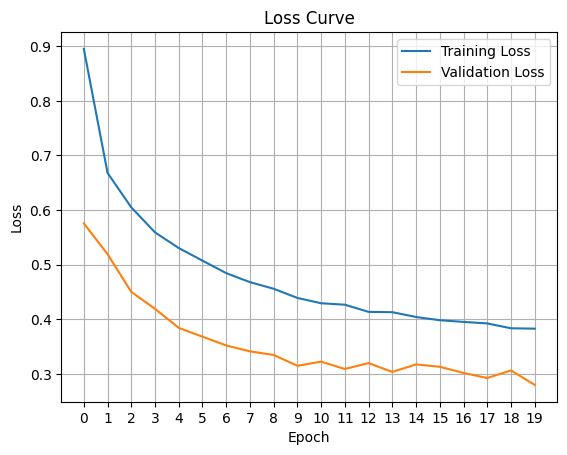

In [ ]:
import matplotlib.pyplot as plt

# Plot loss across epochs
plt.plot(historyAug.history['loss'], label='Training Loss')
plt.plot(historyAug.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.xticks(range(len(historyAug.history['loss'])))
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Get the model's predictions on the test set
y_pred = modelAug.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Compute accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Save metrics for augmentation model
model_names.append("ModelAug")
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1)

# Print the metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Test Accuracy: 0.8902
Precision: 0.8908
Recall: 0.8902
F1 Score: 0.8904


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


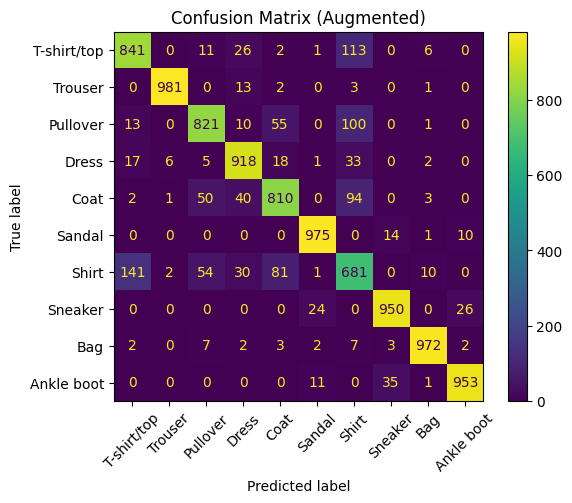

In [ ]:
# Get the predicted class probabilities from the model on the test set
y_pred_probs = modelAug.predict(x_test)

# Convert probabilities to class labels by taking the index of the highest probability for each prediction
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the confusion matrix comparing true labels with predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object with class labels for better readability
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
])

# Plot the confusion matrix with a color map and rotated x-axis labels for clarity
disp.plot(cmap='viridis', xticks_rotation=45)

# Add a title to the plot
plt.title('Confusion Matrix (Augmented)')

# Display the plot
plt.show()


## MODEL 10

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build Model10
model10 = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile Model10
model10.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Fit Model10
history10 = model10.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 46s 63ms/step - accuracy: 0.6724 - loss: 0.9198 - val_accuracy: 0.8461 - val_loss: 0.4321
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 64ms/step - accuracy: 0.8380 - loss: 0.4532 - val_accuracy: 0.8740 - val_loss: 0.3520
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.8589 - loss: 0.3896 - val_accuracy: 0.8823 - val_loss: 0.3164
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - accuracy: 0.8767 - loss: 0.3407 - val_accuracy: 0.8913 - val_loss: 0.2973
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.8828 - loss: 0.3221 - val_accuracy: 0.8975 - val_loss: 0.2780
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 62ms/step - accuracy: 0.8952 - loss: 0.2924 - val_accuracy: 0.9031 - val_loss: 0.2686
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 45s 65ms/step - accuracy: 0.8946 - loss: 0.2808 - val_accuracy: 0.9040 - val_loss: 0.2601
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.9055 - loss: 0.2605 - 

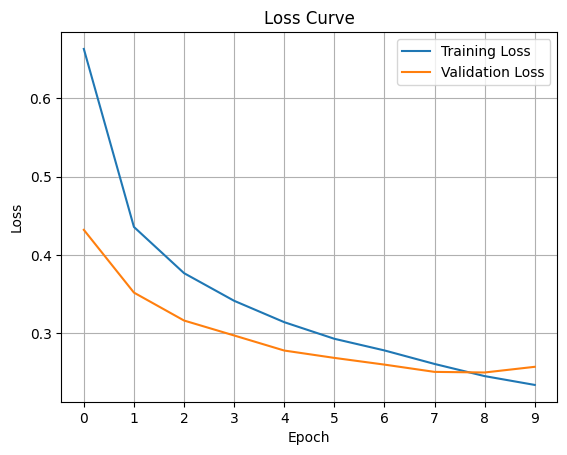

In [ ]:
import matplotlib.pyplot as plt
# Plot loss
plt.plot(history10.history['loss'], label='Training Loss')
plt.plot(history10.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.xticks(range(len(history10.history['loss'])))
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Get the model's predictions on the test set
y_pred = model10.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Compute accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Save metrics for Model10
model_names.append("Model10")
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1)

# Print the metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Test Accuracy: 0.8995
Precision: 0.9006
Recall: 0.8995
F1 Score: 0.8989


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


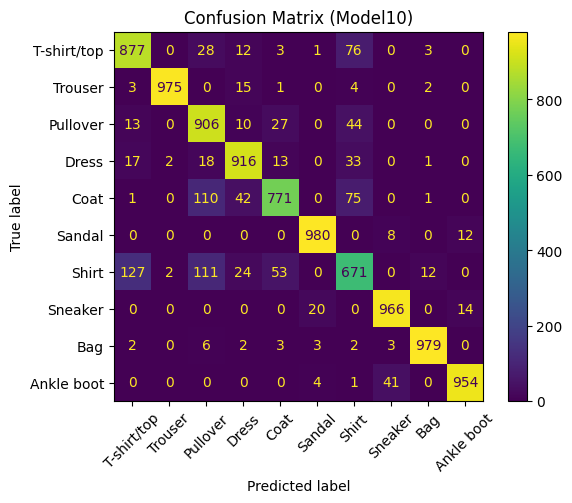

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the predicted class probabilities from model10 on the test set
y_pred_probs = model10.predict(x_test)

# Convert the probability outputs into class predictions by selecting the index of the highest probability
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the confusion matrix by comparing the true labels with the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a display object for the confusion matrix with readable class labels (Fashion MNIST categories)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
])

# Plot the confusion matrix using the 'viridis' color map and rotate x-axis labels for better readability
disp.plot(cmap='viridis', xticks_rotation=45)

# Set the plot title to reflect the model used
plt.title('Confusion Matrix (Model10)')

# Display the confusion matrix plot
plt.show()


## MODEL 32

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build Model32
model32 = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile Model32
model32.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Fit Model32
history32 = model32.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 38ms/step - accuracy: 0.7094 - loss: 0.8063 - val_accuracy: 0.8669 - val_loss: 0.3657
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.8518 - loss: 0.4022 - val_accuracy: 0.8804 - val_loss: 0.3164
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.8747 - loss: 0.3460 - val_accuracy: 0.8929 - val_loss: 0.2878
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.8914 - loss: 0.3057 - val_accuracy: 0.8964 - val_loss: 0.2846
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 88s 40ms/step - accuracy: 0.9027 - loss: 0.2653 - val_accuracy: 0.9001 - val_loss: 0.2674
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.9056 - loss: 0.2579 - val_accuracy: 0.9033 - val_loss: 0.2647
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.9145 - loss: 0.2362 - val_accuracy: 0.9107 - val_loss: 0.2499
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9199 -

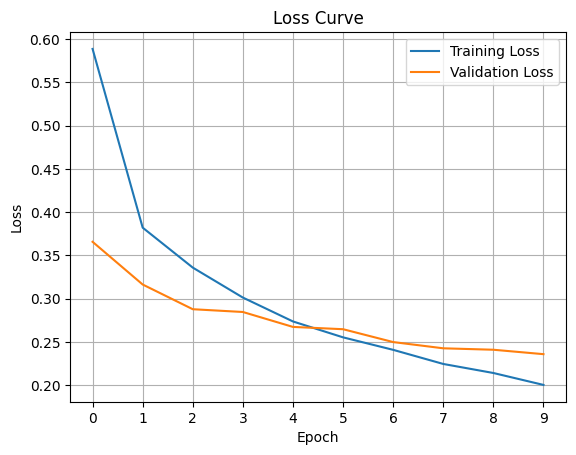

In [ ]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history32.history['loss'], label='Training Loss')
plt.plot(history32.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.xticks(range(len(history32.history['loss'])))
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Get the model's predictions on the test set
y_pred = model32.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Compute accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Save metrics for Model32
model_names.append("Model32")
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1)

# Print the metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Test Accuracy: 0.9068
Precision: 0.9066
Recall: 0.9068
F1 Score: 0.9059


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


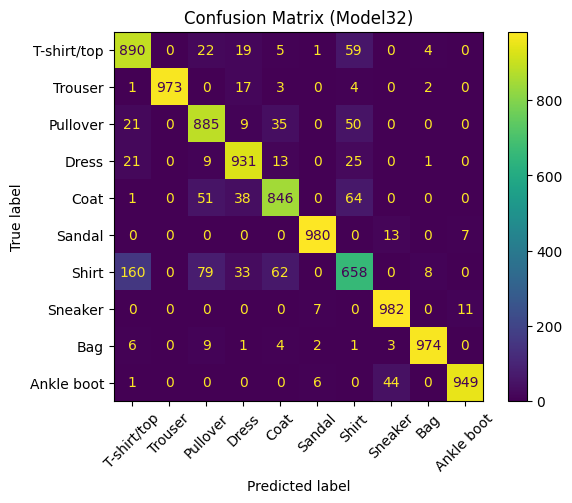

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the predicted class probabilities from model32 on the test set
y_pred_probs = model32.predict(x_test)

# Convert the probability outputs into class predictions by selecting the index of the highest probability
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the confusion matrix by comparing the true labels with the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a display object for the confusion matrix with readable class labels (Fashion MNIST categories)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
])

# Plot the confusion matrix using the 'viridis' color map and rotate x-axis labels for better readability
disp.plot(cmap='viridis', xticks_rotation=45)

# Set the plot title to reflect the model used
plt.title('Confusion Matrix (Model10)')

# Display the confusion matrix plot
plt.show()


# COMPARING THE MODELS BY METRICS

In [ ]:
# Check that all values were saved
print("Model Names:", model_names)
print("Accuracies:", accuracies)
print("Precisions:", precisions)
print("Recalls:", recalls)
print("F1 Scores:", f1_scores)


Model Names: ['Model', 'ModelAug', 'Model10', 'Model32']
Accuracies: [0.9089, 0.8902, 0.8995, 0.9068]
Precisions: [0.910483230564768, 0.8908230531099031, 0.9006171436185537, 0.9066345025203937]
Recalls: [0.9089, 0.8902, 0.8995, 0.9068]
F1 Scores: [0.9094563673220427, 0.8903696630517155, 0.8988552165542549, 0.9059001125416175]


In [ ]:
import pandas as pd

# Data
model_names = [
    "Model (20 epochs, batch=64)",
    "ModelAug (20 epochs, batch=64, augmented)",
    "Model10 (10 epochs, batch=64)",
    "Model32 (10 epochs, batch=32)"
]

accuracies = [0.9089, 0.8902, 0.8995, 0.9068]
precisions = [0.910483230564768, 0.8908230531099031, 0.9006171436185537, 0.9066345025203937]
recalls = [0.9089, 0.8902, 0.8995, 0.9068]
f1_scores = [0.9094563673220427, 0.8903696630517155, 0.8988552165542549, 0.9059001125416175]

# Create a DataFrame
df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Set formatting
pd.set_option('display.float_format', '{:.4f}'.format)

# Display the table
print(df.to_string(index=False))


                                    Model  Accuracy  Precision  Recall  F1 Score
              Model (20 epochs, batch=64)    0.9089     0.9105  0.9089    0.9095
ModelAug (20 epochs, batch=64, augmented)    0.8902     0.8908  0.8902    0.8904
            Model10 (10 epochs, batch=64)    0.8995     0.9006  0.8995    0.8989
            Model32 (10 epochs, batch=32)    0.9068     0.9066  0.9068    0.9059


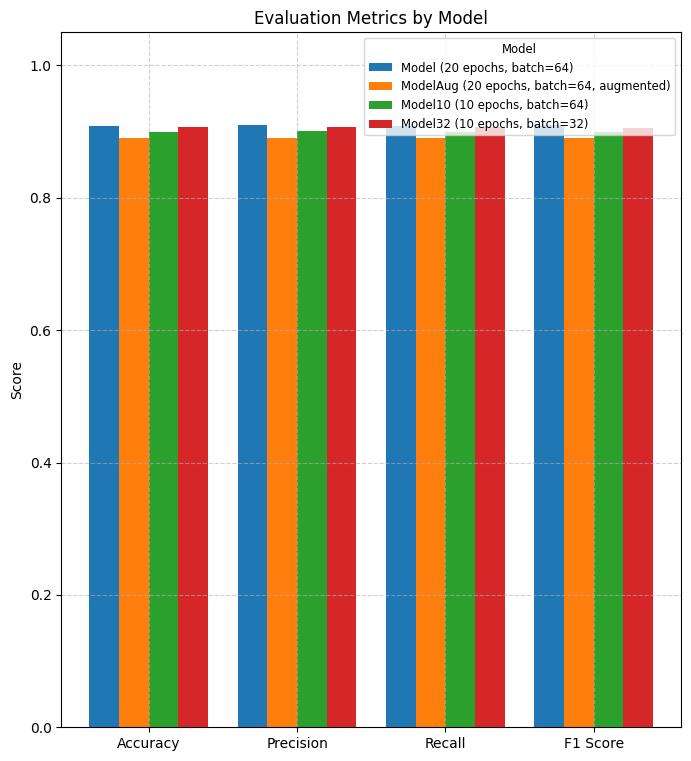

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Group metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracies, precisions, recalls, f1_scores]

x = np.arange(len(metrics))
width = 0.2

plt.figure(figsize=(8, 5))

# Plot bars for each model
for i in range(len(model_names)):
    model_scores = [values[j][i] for j in range(len(metrics))]
    plt.bar(x + (i - 1.5) * width, model_scores, width, label=model_names[i])

plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Evaluation Metrics by Model')
plt.ylim(0, 1.05)
plt.subplots_adjust(top=1.5)
plt.legend(title='Model', fontsize='small', title_fontsize='small')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
